# <u>ML Model</u>

## Walkthrough 👋
#### This notebook has two phases :-

1. Data Analysis (EDA) and Visualizations
2. Reccomendation system

## Data analysis 📊

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity


import warnings; warnings.simplefilter('ignore')

In [2]:
movies = pd. read_csv('movies_metadata.csv')
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [4]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Taking a look at Release years of the movies

In [6]:
movies['year'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

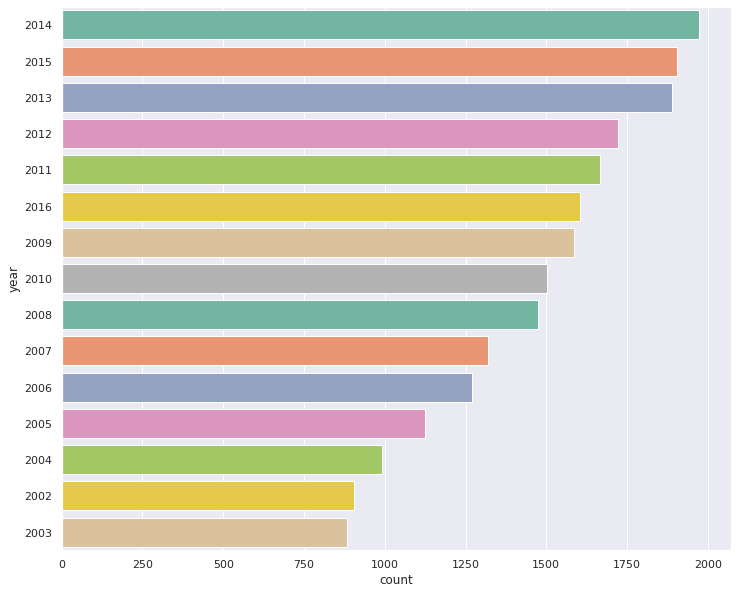

In [7]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data=movies, palette="Set2", order=movies['year'].value_counts().index[0:15])


#### We can see that as the years went by, especially from the 2000's, the no. of movies release constantly kept increasing which indicates the rise of cinema down the decade.
<br>



***

### Analyzing movie release dates
Release dates around specific months can play a huge role for a movie to bomb it in the box office. <br>
We will try to take an insight on how release dates impact a movie's overall revenue

In [8]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [9]:
def get_month(x):
    try:
        return month[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [10]:
movies['month'] = movies['release_date'].apply(get_month)

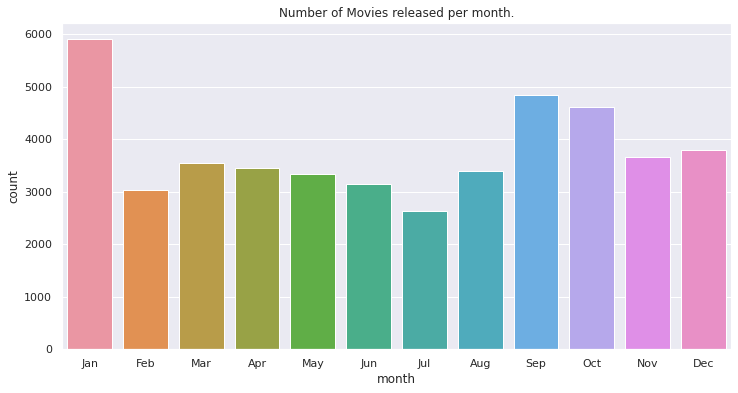

In [11]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released per month.")
sns.countplot(x='month', data=movies, order=month)

#### As we can see that around the new year in January, a no. of production houses release their movies.

***

### Gross / Revenue earned by movies
In this section we'll see the total revenue earned by a movie in it's time in the cinema and take a look at budget, box office collection & net gross

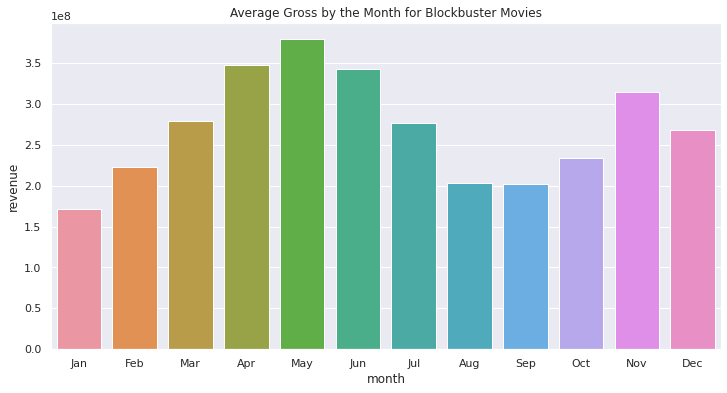

In [12]:
month_mean = pd.DataFrame(movies[movies['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['month'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='month', y='revenue', data=month_mean, order=month)

#### We see that the months of April, May and June have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment. Thus, most successfull movies could have been released in these months

In [13]:
movies[movies['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,year
9247,Revolutionary Girl Utena: The Movie,998000,0.0,1999
39203,Life Feels Good,996519,0.0,2013
11609,Kidulthood,994000,165000.0,2006
34215,The Peanuts Movie,99000000,246233113.0,2015
39688,Don't Breathe,9900000,157100845.0,2016
39842,Friend Request,9900000,2400000.0,2016
39793,Elle,9804690,2341534.0,2016
30179,BMX Bandits,980385,0.0,1983
14,Cutthroat Island,98000000,10017322.0,1995
4142,The Mummy Returns,98000000,433013274.0,2001


#### Two Pirates of the Carribean films occupy the top spots in this list with a staggering budget of over 300 million dollars. 

In [14]:
gross_top = movies[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
gross_top.head(20)

,title,budget,revenue,year
14551,Avatar,237000000,2.787965e+09,2009
26555,Star Wars: The Force Awakens,245000000,2.068224e+09,2015
1639,Titanic,200000000,1.845034e+09,1997
17818,The Avengers,220000000,1.519558e+09,2012
25084,Jurassic World,150000000,1.513529e+09,2015
28830,Furious 7,190000000,1.506249e+09,2015
26558,Avengers: Age of Ultron,280000000,1.405404e+09,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000,1.342000e+09,2011
22110,Frozen,150000000,1.274219e+09,2013
42222,Beauty and the Beast,160000000,1.262886e+09,2017


#### These are some the highest grossing movies of all time

***

### Taking a look at duration / runtime of movies

In [15]:
movies['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

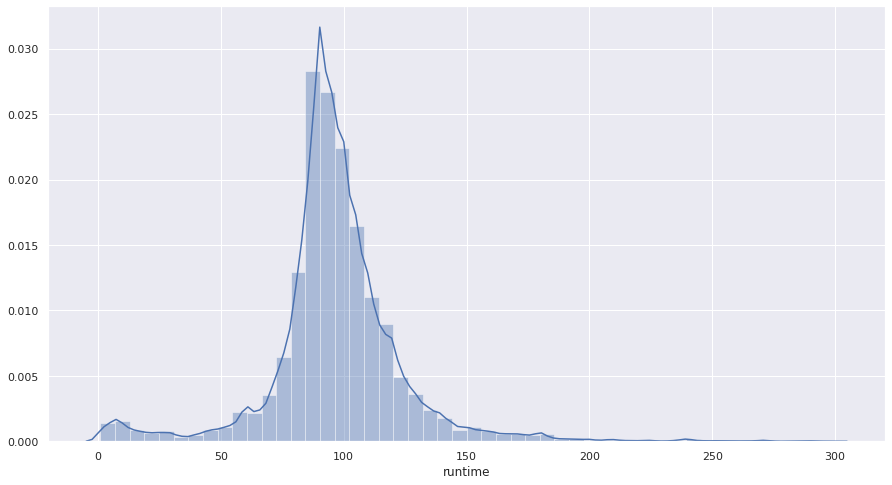

In [16]:
movies['runtime'] = movies['runtime'].astype('float')
plt.figure(figsize=(15,8))
sns.distplot(movies[(movies['runtime'] < 300) & (movies['runtime'] > 0)]['runtime'])

#### The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a staggering 1256 minutes (or 20 hours) long !


***

### Defining a correlation heat map to get the idea of dependable variables

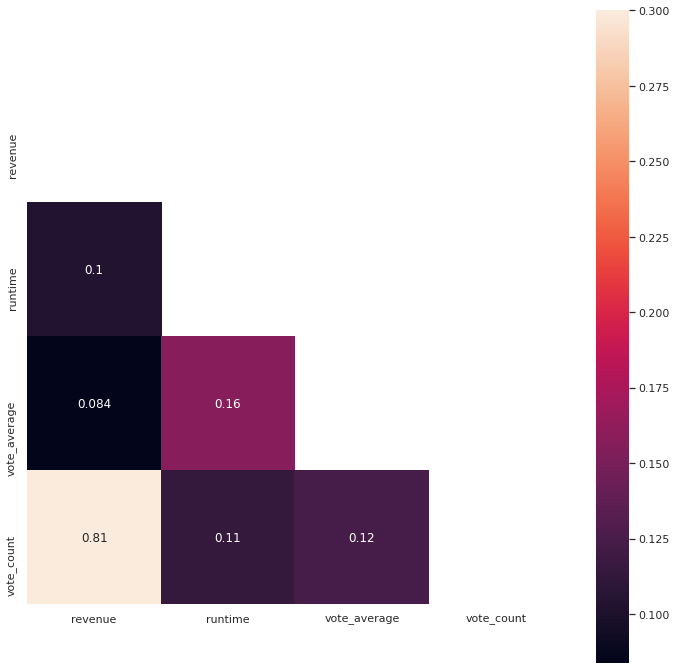

In [17]:
sns.set(font_scale=1)
corr = movies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12,12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

***

***

# Machine Learning Model 📽
For making our recommendation system we need to perform these techniques :-

1. Keyword extraction -> Extract keywords from description
2. Count Vectorizer -> Count frequency of words
3. Cosine Similarity -> Find cosine similarity between all movie titles

In [18]:
# This csv provides the indices for the movies 

links_small = pd.read_csv('links_small.csv')
links_small.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


### Finalizing dataset :-

In [19]:
# These unique movie ids will be used as primary index for referring each movie

links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [20]:
movies[movies['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,month


In [21]:
# we need to make sure that the ID column of our main dataframe is clean and of (type) integer to impliment error free cosine function 


def convert(n):   # integer conversion of IDs 
    try:
        return int(n)
    except:
        return np.nan


In [22]:
movies['id'] = movies['id'].apply(convert)

In [23]:
movies['id'].isnull().sum()  # fiding any null values in IDs

3

In [24]:
movies[movies['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,month
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [25]:
movies = movies.drop([19730, 29503, 35587]) 

In [26]:
movies['id'] = movies['id'].astype('int')

In [27]:
# filtering all the movies which have their ID's in links_small dataset

Fmovies = movies[movies['id'].isin(links_small)]  
Fmovies.shape

(9099, 26)

In [28]:
# building model based on text of every movie in the dataset & then use it over cosine similarity to predict nearest recommendations

Fmovies['tagline'] = Fmovies['tagline'].fillna('')
Fmovies['description'] = Fmovies['overview'] + Fmovies['tagline']
Fmovies['description'] = Fmovies['description'].fillna('')  # replacing NaN values with an empty string

In [29]:
Fmovies.to_csv('Fmovies.txt', index=False, sep='\t')

In [30]:
ls -lah Fmovies.csv

-rw-rw-r-- 1 dhruv11 dhruv11 20K Sep 12 17:42 Fmovies.csv


In [31]:
# constructing the required TF-IDF matrix by fitting and transforming the data

tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english') 
tfidf_matrix = tf.fit_transform(Fmovies['description'])

#### .pk file to use it in the API

In [32]:
import pickle as pickle
with open('tf.pk','wb') as fin:
    pickle.dump(tf,fin)

In [33]:
ls -lah tf.pk 

-rw-rw-r-- 1 dhruv11 dhruv11 9.3M Sep 13 19:18 tf.pk


In [34]:
# initializing cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) 

In [35]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

In [36]:
# trying to construct a reverse map of indices & movie titles.

Fmovies = Fmovies.reset_index()
titles = Fmovies['title']
indices = pd.Series(Fmovies.index, index=Fmovies['title'])

In [37]:
def get_recommendations(title):
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx])) # getting the pairwsie similarity scores of all movies with that movie
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # sorting the movies based on the similarity scores
    
    sim_scores = sim_scores[1:11] # getting the scores of the 10 most similar movies
    
    movie_indices = [i[0] for i in sim_scores]  # gettng the movie indices
    
    return titles.iloc[movie_indices]  # Returning the top 10 most similar movies


In [38]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

In [39]:
get_recommendations('Iron Man').head(10)

8285                 Iron Man 3
7506                 Iron Man 2
8758    Avengers: Age of Ultron
8090                      Brake
6055                    Hostage
5661                   Scarface
279           The Swan Princess
7082                       Igor
3009          Missing in Action
5177            The Magic Flute
Name: title, dtype: object